<a href="https://colab.research.google.com/github/Adammalik28/machine_learning/blob/main/metode%20naive%20bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import modul

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Konfigurasi Visual
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

def print_status(message):
    print(f"[INFO] {message}")

# PERSIAPAN DATA

In [2]:
print_status("Memuat dan memproses data...")
df = pd.read_csv('insurance.csv')

# Binning
df['charges_group'] = pd.qcut(df['charges'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# Encoding
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_target = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['charges_encoded'] = le_target.fit_transform(df['charges_group'])

df = pd.get_dummies(df, columns=['region'], drop_first=True)

X = df.drop(['charges', 'charges_group', 'charges_encoded'], axis=1)
y = df['charges_encoded']
feature_names = X.columns.tolist()

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (CRITICAL FOR NAIVE BAYES)
print_status("Melakukan standarisasi skala data (Scaling)...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)

[INFO] Memuat dan memproses data...
[INFO] Melakukan standarisasi skala data (Scaling)...


# MODELING

In [3]:
print_status("Melatih Gaussian Naive Bayes...")
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

[INFO] Melatih Gaussian Naive Bayes...


GaussianNB()

# EVALUASI DAN VISUALISASI


🏆 Akurasi Naive Bayes: 70.90%


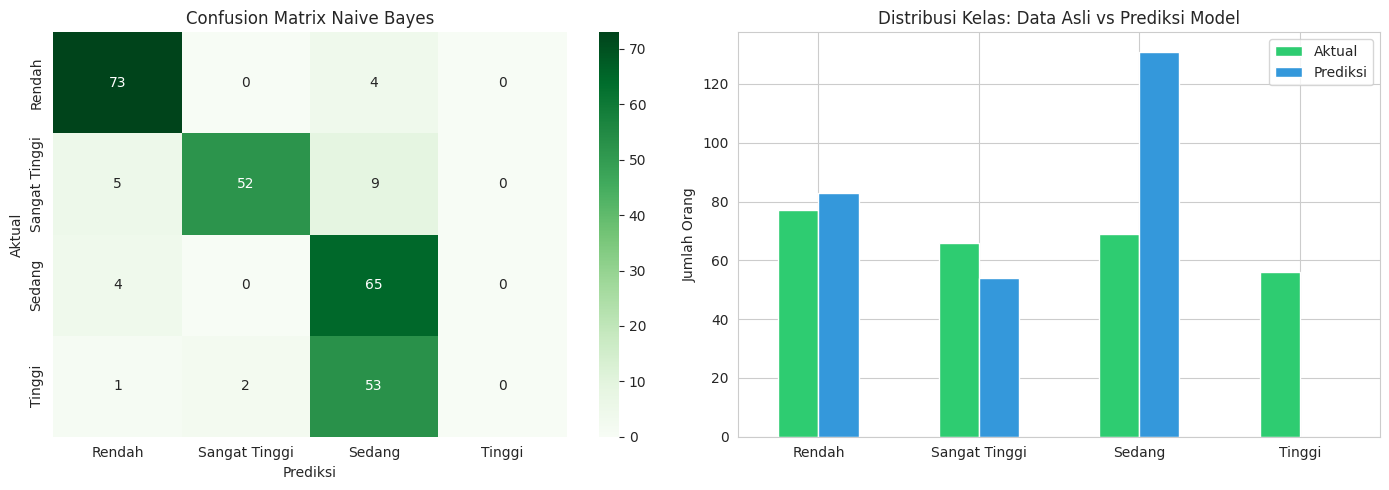

In [4]:
y_pred = nb_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\n🏆 Akurasi Naive Bayes: {acc * 100:.2f}%")

plt.figure(figsize=(14, 5))

# --- Visual 1: Confusion Matrix ---
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# --- Visual 2: Perbandingan Aktual vs Prediksi ---
plt.subplot(1, 2, 2)
# Menghitung jumlah per kelas
actual_counts = pd.Series(le_target.inverse_transform(y_test)).value_counts().sort_index()
pred_counts = pd.Series(le_target.inverse_transform(y_pred)).value_counts().sort_index()

comparison_df = pd.DataFrame({'Aktual': actual_counts, 'Prediksi': pred_counts})
comparison_df.plot(kind='bar', ax=plt.gca(), color=['#2ecc71', '#3498db'])
plt.title('Distribusi Kelas: Data Asli vs Prediksi Model')
plt.xticks(rotation=0)
plt.ylabel('Jumlah Orang')

plt.tight_layout()
plt.show()

# INTERFACE INPUT MANUAL

In [5]:
def run_interactive_prediction():
    print("\n" + "="*50)
    print("🧮 PROGRAM PREDIKSI ASURANSI (NAIVE BAYES)")
    print("="*50)

    while True:
        try:
            print("\n--- Masukkan Data Pasien ---")
            # Menggunakan input satu baris untuk variasi (atau tetap per baris)
            age = int(input("Usia\t\t: "))
            bmi = float(input("BMI\t\t: "))
            children = int(input("Jumlah Anak\t: "))

            sex = input("Gender (male/female): ").lower()
            smoker = input("Perokok (yes/no)\t: ").lower()
            region = input("Wilayah (northeast/northwest/southeast/southwest): ").lower()

            # Validasi sederhana
            if sex not in ['male', 'female'] or smoker not in ['yes', 'no']:
                raise ValueError("Input teks salah.")

            # Prepare Data Frame
            input_df = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)
            input_df['age'] = age
            input_df['bmi'] = bmi
            input_df['children'] = children
            input_df['sex'] = le_sex.transform([sex])[0]
            input_df['smoker'] = le_smoker.transform([smoker])[0]

            if region == 'northwest': input_df['region_northwest'] = 1
            elif region == 'southeast': input_df['region_southeast'] = 1
            elif region == 'southwest': input_df['region_southwest'] = 1

            # SCALING WAJIB untuk NB
            input_scaled = scaler.transform(input_df)

            # Predict
            pred_idx = nb_model.predict(input_scaled)[0]
            result = le_target.inverse_transform([pred_idx])[0]

            print("-" * 40)
            print(f"💡 HASIL: Biaya Asuransi -> {result.upper()}")
            print("-" * 40)

        except Exception as e:
            print(f"❌ Error input: {e}")

        if input("\nHitung lagi? (y/n): ").lower() != 'y':
            break

run_interactive_prediction()


🧮 PROGRAM PREDIKSI ASURANSI (NAIVE BAYES)

--- Masukkan Data Pasien ---
Usia		: 20
BMI		: 25.5
Jumlah Anak	: 2
Gender (male/female): male
Perokok (yes/no)	: yes
Wilayah (northeast/northwest/southeast/southwest): northwest
----------------------------------------
💡 HASIL: Biaya Asuransi -> SANGAT TINGGI
----------------------------------------

Hitung lagi? (y/n): n
